# 1) Введение
### О проекте
Работу выполнили студенты 2 курса Высшей школы ИТИС Зиятдинов Ремир, Кочедыков Александр и Шарифуллин Ильназ группы 11-804 и 11-801.

<b>Задача проекта</b>: на основе данных с рецензиями отелей Лас-Вегаса:
1. Построить модель, предсказывающую оценку с наибольшей точностью. 
2. На основе нашего датасета определим, пользователи каких стран оставляют отзывы об отелях чаще и в какой период года отзывов больше всего.

Для достижения этой цели берутся данные 504 онлайн-обзоров и на их основе строятся различные модели, и из них выбирается лучшая. Для работы берутся отзывы на 21 отель, написанные в период с января по август 2015 года. 

<b>Поля</b>: полями данных являются услуги, которые может предложить каждый из отелей: спортзал, казино, спа, в каком номер проживал, количество звезд у отеля и т.д. Также учитываются данные о путевке самого рецензента: в какие периоды он проживал в отели, тип его путевки. Есть данные о самом рецензенте: откуда он приехал, его характеристика как рецензента(полезность, количество отзывов). В таблице есть данные о рецензии: когда она была написана, финальная оценка отелю.

<b>Источник</b>: https://github.com/Yorko/mlcourse.ai/blob/master/data/LasVegasTripAdvisorReviews-Dataset.csv

# 2) Считывание и описание датасета и подготовка данных
### Считывание данных и просмотр таблицы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import mglearn as mglearn
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import pylab as pl
plt.style.use('ggplot')
%matplotlib inline
import sklearn.metrics as metric
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



df=pd.read_csv('/Users/remir/data_project/LasVegasTripAdvisorReviews-Dataset.csv',delimiter=';')

df.head()




,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
User country         504 non-null object
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Period of stay       504 non-null object
Traveler type        504 non-null object
Pool                 504 non-null object
Gym                  504 non-null object
Tennis court         504 non-null object
Spa                  504 non-null object
Casino               504 non-null object
Free internet        504 non-null object
Hotel name           504 non-null object
Hotel stars          504 non-null object
Nr. rooms            504 non-null int64
User continent       504 non-null object
Member years         504 non-null int64
Review month         504 non-null object
Review weekday       504 non-null object
dtypes: int64(6), object(14)
memory usage: 78.9+ KB


### Поля датасета и их описание:
(String) User country - Страна рецезента

(Integer) Nr. reviews - Количество отзывов, оставленных конкретным рецензентом

(Integer) Nr. hotel reviews - Количество отзывов об отелях, оставленных конкретным рецензентом

(Integer) Helpful votes - Полезность отзыва (количество положительных оценок)

(Integer) Score - Оценка из отзыва, выставленная отелю (значения: от 1 до 5)

(String) Period of stay - Период пребывания в отеле

(String) Traveler type - Тип путешествия

(Boolean) Pool - Наличие бассейна (Yes/No)

(Boolean) Gym - Наличие тренажерного зала (Yes/No)

(Boolean) Tennis court - Наличие теннисного корта (Yes/No)

(Boolean) Spa - Наличие спа (Yes/No)

(Boolean) Casino - Наличие казино (Yes/No)

(Boolean) Free internet - Наличие бесплатного доступа в Интернета (Yes/No)

(String) Hotel name - Название отеля

(Integer) Hotel stars - Количество звезд отеля (значения: от 3 до 5)

(Integer) Nr. rooms - Количество номеров в отеле

(String) User continent - Континент рецензента

(Integer) Member years - Стаж рецензента

(String) Review month - Месяц написания отзыва

(String) Review weekday - День недели написания отзыва

### Проверим на отсутсвие пустых значений

In [3]:
df.isnull().any().any()

False

In [4]:
from sklearn.preprocessing import LabelEncoder

categor_symptom = df.dtypes == object
categor_col = df.columns[categor_symptom].tolist()
le = LabelEncoder()
df[categor_col] = df[categor_col].apply(lambda col: le.fit_transform(col))
df.head(100)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,46,11,4,13,5,0,3,0,1,0,0,1,1,2,0,3773,3,9,4,4
1,46,119,21,75,3,0,0,0,1,0,0,1,1,2,0,3773,3,3,4,0
2,46,36,9,25,5,2,2,0,1,0,0,1,1,2,0,3773,3,2,3,2
3,45,14,7,14,4,2,3,0,1,0,0,1,1,2,0,3773,2,6,3,0
4,3,5,5,2,4,2,4,0,1,0,0,1,1,2,0,3773,3,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,21,16,48,5,0,1,1,1,1,1,1,1,15,2,2884,3,12,2,4
96,45,34,17,30,4,0,2,1,1,1,1,1,1,16,2,1467,2,8,4,3
97,46,12,6,1,5,0,3,1,1,1,1,1,1,16,2,1467,3,2,4,3
98,33,79,39,51,3,0,1,1,1,1,1,1,1,16,2,1467,1,5,3,6


### Замена логических переменных на бинарные

In [5]:
#df = df.drop(["Review month", "Review weekday","Hotel name","Member years", "User continent", "Helpful votes","Period of stay","Traveler type" ], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
User country         504 non-null int64
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Period of stay       504 non-null int64
Traveler type        504 non-null int64
Pool                 504 non-null int64
Gym                  504 non-null int64
Tennis court         504 non-null int64
Spa                  504 non-null int64
Casino               504 non-null int64
Free internet        504 non-null int64
Hotel name           504 non-null int64
Hotel stars          504 non-null int64
Nr. rooms            504 non-null int64
User continent       504 non-null int64
Member years         504 non-null int64
Review month         504 non-null int64
Review weekday       504 non-null int64
dtypes: int64(20)
memory usage: 78.9 KB


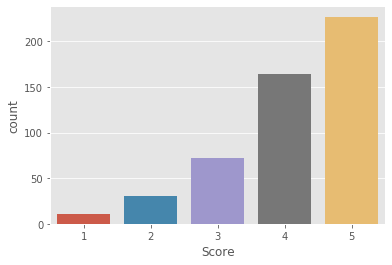

Количество 1 = 11
Количество 2 = 30
Количество 3 = 72
Количество 4 = 164
Количество 5 = 227


In [6]:
count_plt = sns.countplot(x='Score', data=df)
plt.show()
print("Количество 1 =", len(df[df['Score'] == 1]))
print("Количество 2 =", len(df[df['Score'] == 2]))
print("Количество 3 =", len(df[df['Score'] == 3]))
print("Количество 4 =", len(df[df['Score'] == 4]))
print("Количество 5 =", len(df[df['Score'] == 5]))

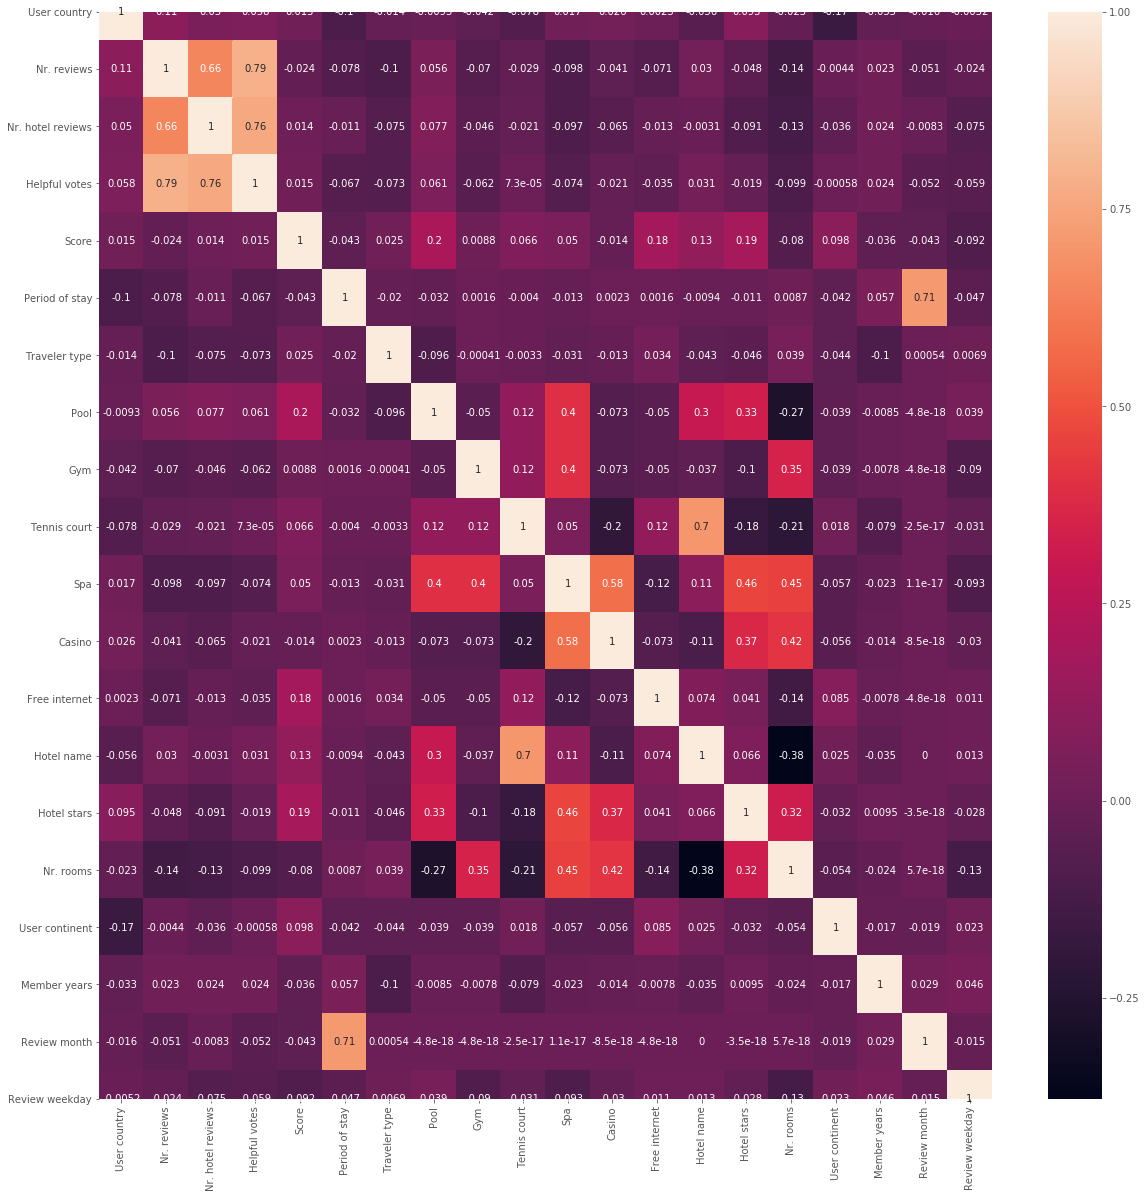

Pool             0.203248
Free internet    0.184731
Hotel stars      0.191490
Name: Score, dtype: float64


In [7]:
plt.figure(figsize=(20, 20))
cor_matrix = df.corr()
sns.heatmap(cor_matrix, annot=True)
plt.show()

cor_target = abs(cor_matrix['Score'])
important_columns = cor_target[cor_target >= 0.15].drop('Score')
print(important_columns)

In [8]:
cor_matrix

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
User country,1.000000,0.105106,0.049863,0.058319,0.015289,-0.100979,-0.013523,-9.314086e-03,-4.208143e-02,-7.778942e-02,1.679176e-02,2.634940e-02,2.280511e-03,-0.056042,9.496619e-02,-2.308273e-02,-0.166383,-0.033463,-1.618702e-02,-0.005195
Nr. reviews,0.105106,1.000000,0.655080,0.790696,-0.024320,-0.078050,-0.101939,5.647509e-02,-6.986994e-02,-2.945445e-02,-9.757454e-02,-4.111311e-02,-7.074043e-02,0.030347,-4.824147e-02,-1.365803e-01,-0.004367,0.022783,-5.110015e-02,-0.023937
Nr. hotel reviews,0.049863,0.655080,1.000000,0.764322,0.013718,-0.011165,-0.075458,7.690941e-02,-4.610116e-02,-2.060371e-02,-9.656774e-02,-6.491372e-02,-1.340215e-02,-0.003121,-9.136332e-02,-1.288962e-01,-0.035962,0.023696,-8.260990e-03,-0.075266
Helpful votes,0.058319,0.790696,0.764322,1.000000,0.015472,-0.067307,-0.073397,6.113211e-02,-6.188265e-02,7.322307e-05,-7.407429e-02,-2.132168e-02,-3.458875e-02,0.031068,-1.900017e-02,-9.914754e-02,-0.000578,0.024259,-5.188278e-02,-0.059460
Score,0.015289,-0.024320,0.013718,0.015472,1.000000,-0.043332,0.024860,2.032482e-01,8.817711e-03,6.591239e-02,4.982007e-02,-1.407349e-02,1.847311e-01,0.129595,1.914899e-01,-8.020005e-02,0.098061,-0.036190,-4.283756e-02,-0.092219
Period of stay,-0.100979,-0.078050,-0.011165,-0.067307,-0.043332,1.000000,-0.020158,-3.184810e-02,1.592405e-03,-3.981013e-03,-1.273924e-02,2.310504e-03,1.592405e-03,-0.009409,-1.051908e-02,8.743038e-03,-0.042481,0.057144,7.096588e-01,-0.047412
Traveler type,-0.013523,-0.101939,-0.075458,-0.073397,0.024860,-0.020158,1.000000,-9.585009e-02,-4.131470e-04,-3.305176e-03,-3.139917e-02,-1.318805e-02,3.429120e-02,-0.042718,-4.622513e-02,3.907567e-02,-0.044193,-0.101280,5.352321e-04,0.006918
Pool,-0.009314,0.056475,0.076909,0.061132,0.203248,-0.031848,-0.095850,1.000000e+00,-5.000000e-02,1.250000e-01,4.000000e-01,-7.254763e-02,-5.000000e-02,0.295420,3.302891e-01,-2.745230e-01,-0.038569,-0.008503,-4.794315e-18,0.038889
Gym,-0.042081,-0.069870,-0.046101,-0.061883,0.008818,0.001592,-0.000413,-5.000000e-02,1.000000e+00,1.250000e-01,4.000000e-01,-7.254763e-02,-5.000000e-02,-0.036927,-1.032154e-01,3.497020e-01,-0.038569,-0.007810,-4.794315e-18,-0.089575
Tennis court,-0.077789,-0.029454,-0.020604,0.000073,0.065912,-0.003981,-0.003305,1.250000e-01,1.250000e-01,1.000000e+00,5.000000e-02,-1.995060e-01,1.250000e-01,0.701621,-1.754661e-01,-2.113750e-01,0.017678,-0.079236,-2.457087e-17,-0.030696


Т.к. классы у нас несбалансированы, то использование метрики accuracy и MSE не актуально. Будем испотльзовать precision и recall. 

### Одномерный анализ (анализ выявления отдельных признаков независимо от других)
Одномерный анализ - анализ каждого признака по отдельности для определения и нахождения признаков, значения которого оказывают наиболее сильное влияние на модель и ее свойства.

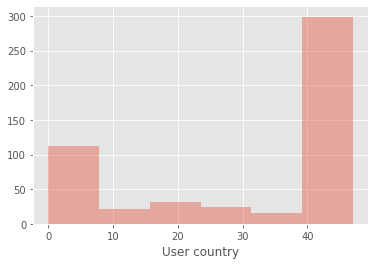

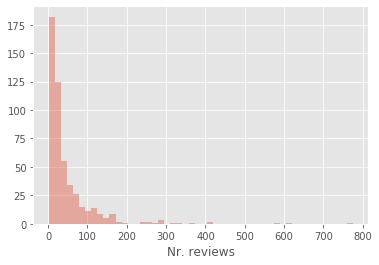

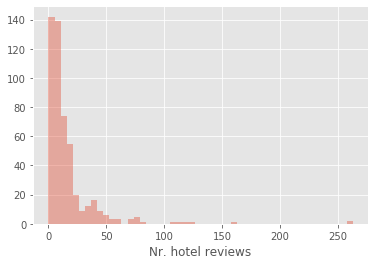

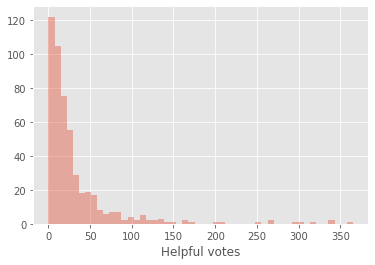

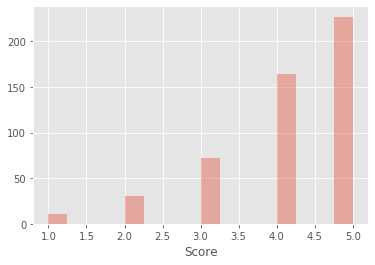

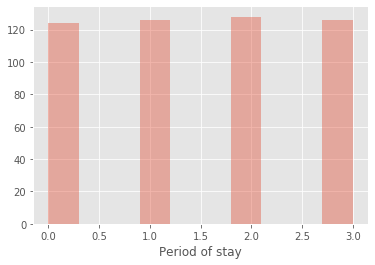

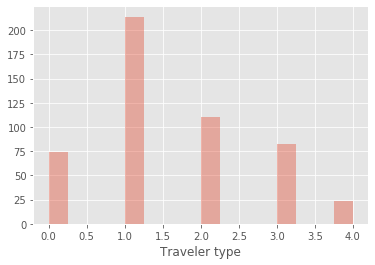

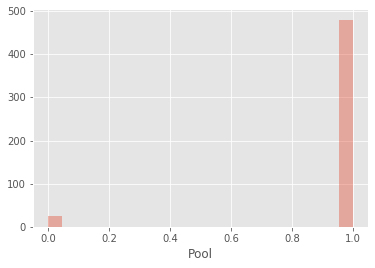

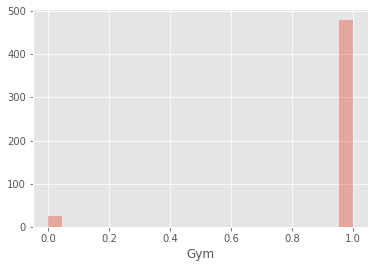

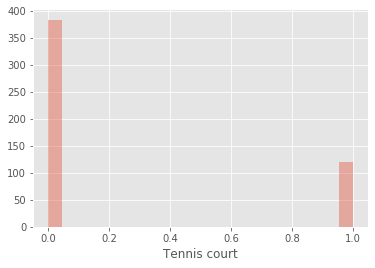

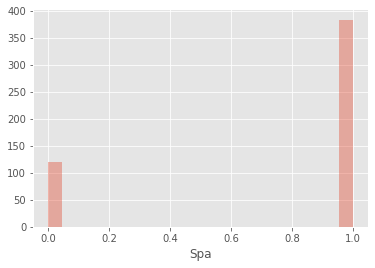

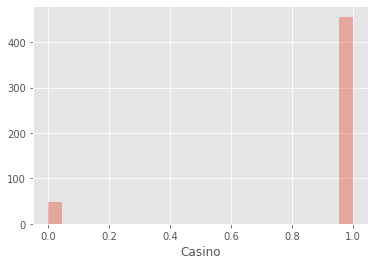

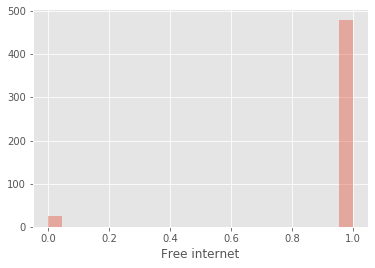

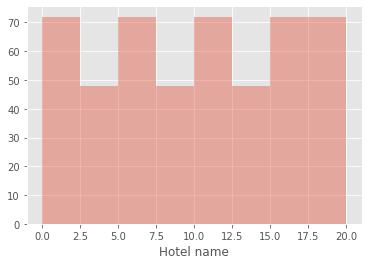

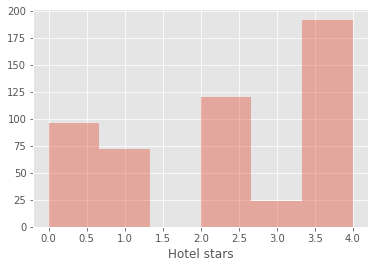

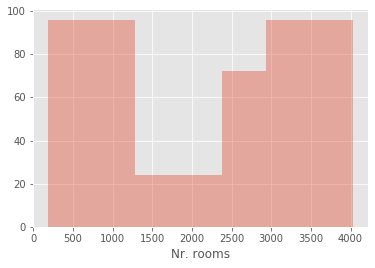

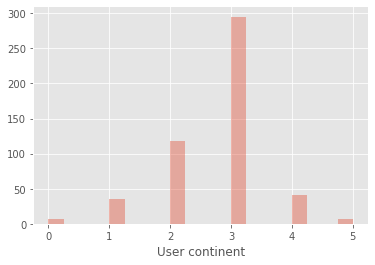

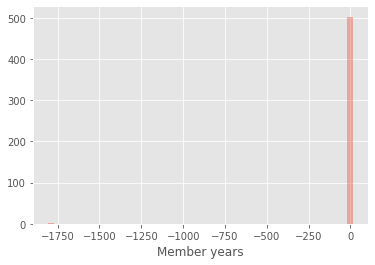

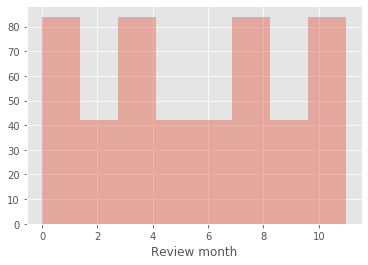

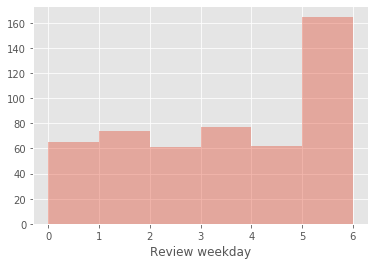

In [9]:
for i in df.var().index:
    sns.distplot(df[i],kde=False)
    plt.show()

### Создаем тестовую и тренеровочную выборки

Обучающая выборка — выборка, по которой производится настройка (оптимизация параметров) модели зависимости.
Если модель зависимости построена по обучающей выборке, то оценка качества этой модели, сделанная по той же выборке оказывается, как правило, оптимистически смещенной. Это нежелательное явление называют переобучением. Хорошую эмпирическую оценку качества построенной модели дает ее проверка на независимых данных, которые не использовались для обучения.

Тестовая (контрольная) выборка (test sample) — выборка, по которой оценивается качество построенной модели.  
Если обучающая и тестовая выборки независимы, то оценка, сделанная по тестовой выборке, является несмещённой. 


In [10]:
x = df[[c for c in df.columns if c != "Score"]]
y = df.values[::,4]


X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(y_train)
print(X_train)
print("some")
print(y_test)
print(X_test)

[4 5 5 4 5 4 5 5 3 4 5 3 4 2 5 5 5 5 5 2 3 4 5 5 2 2 4 4 5 5 4 3 5 4 4 5 4
 4 5 4 4 1 3 4 3 5 3 5 4 5 4 3 4 5 5 4 4 2 2 5 3 3 5 4 5 3 5 4 5 5 5 4 4 3
 5 5 5 5 5 5 3 4 5 4 4 1 4 5 5 2 5 5 2 5 4 5 3 5 5 5 4 4 4 5 4 3 3 4 4 5 4
 2 5 3 5 4 3 5 5 5 4 5 5 4 4 4 5 5 5 3 4 5 4 4 4 4 4 5 4 4 3 4 4 2 5 5 3 4
 5 2 5 5 4 5 4 3 5 4 5 4 4 5 5 5 5 5 4 5 5 4 5 3 5 3 5 4 4 1 4 5 5 5 4 5 2
 5 5 5 4 5 4 5 5 4 5 4 4 4 3 5 5 5 5 4 5 3 5 5 4 5 1 5 3 5 5 5 4 2 4 5 4 5
 3 3 3 4 4 5 4 5 4 5 5 5 4 5 3 4 5 4 5 5 5 2 5 4 5 4 4 4 5 5 5 4 3 2 4 2 2
 5 2 5 5 2 4 1 4 3 4 4 5 4 4 5 5 5 2 5 5 5 4 4 5 5 5 5 3 5 5 4 4 4 2 5 5 3
 4 5 5 4 4 3 4 4 5 5 5 3 4 5 5 3 5 5 2 5 5 5 4 3 4 3 4 4 3 2 4 3 3 3 4 3 5
 4 5 5 5 5 5 5 4 4 4 3 2 5 2 5 3 5 3 5]
     User country  Nr. reviews  Nr. hotel reviews  Helpful votes  \
443            46           32                  5             11   
359            46           13                  4              4   
267            46           15                  5             12   
37           

### Base classifiers
Классификатор дает «базовую» производительность – то есть показатель успеха, которого следует ожидать, даже если просто угадать.Если при анализе объектов обнаружено, что 90% содержат целевое свойство (что в нашем случае является близким), то угадать, что каждый будущий экземпляр объекта обладает целевым свойством, дает 90% вероятность правильного угадывания. Структурирование догадок таким образом эквивалентно использованию метода most_frequent.


In [11]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.4473684210526316

При использовании фиктивного классификатора с параметром dummy, мы получим равномерное рандомное распределение, что нам точно не подходит, т.к. мы видим, что случай не получения доступа очень редок по сравнению со случаем его получения.

In [12]:
clf = DummyClassifier(strategy='uniform',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.19078947368421054

При использовании фиктивного классификатора со stratified параметром, используя данные, рассмотренные выше, этот классификатор прогнозирует вероятность 90% того, что каждый объект, с которым он сталкивается, обладает целевым свойством. Это отличается от обучения фиктивного классификатора параметром most_frequent , поскольку последний предположил бы, что все будущие объекты обладают целевым свойством.

In [13]:
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.3223684210526316

### DecisionTreeClassifier.
Дерево принятия решений - бинарное дерево,в каждой внутренней вершине записано условие и в каждом листе записан прогноз (решение). Оно классифицирует данные. Это дерево складывается из минимального числа вопросов, предполагающих однозначный ответ — «да» или «нет». Последовательно дав ответы на все эти вопросы, мы приходим к правильному выбору. Для повышения обобщающей способности решающего дерева число листьев должно быть как можно меньше, и они должны покрывать подвыборки примерно одинаковой мощности. Регулирование глубины дерева — это техника, которая позволяет уменьшать размер дерева решений, удаляя участки дерева, которые имеют маленький вес. Можно проверять, как влияет глубина дерева на эффективность модели
### Проверим связь между максимальной глубиной дерева и эффективностью нашей модели.

### GridSearchCV 
Используем его для подбора оптимальных параметров для построения DecisionTreeClassifier
C помощью кросс-валидации выбираем оптимальные гиперпараметры алгоритма. Выбираем из следующих наборов:

1) max_depth: [3, 4, 5, 6, 7, 8, 9, 10, None]

2) max_features: ['auto', 'log2', None]

3) min_samples_leaf: range(1, 10)

4) min_samples_split: range(2, 10)

5) criterion: ['gini', 'entropy']

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(DecisionTreeClassifier(random_state=13),
                  param_grid = {'max_depth' : range(3, 10),
                                'max_features' : ['auto', 'log2', None],
                                'min_samples_leaf' : range(1, 10),
                                'min_samples_split' : range(2, 10),
                                'criterion' : ['gini', 'entropy'],
                                'presort' : ['auto', True, False],
                                'splitter' : ['best', 'random']},
                  cv=7, scoring='accuracy').fit(X_train, y_train)
gs.best_params_


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'presort': 'auto',
 'splitter': 'random'}

In [86]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 'auto', min_samples_leaf = 5, min_samples_split = 2, presort = 'auto',splitter='random')
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.4144736842105263


In [87]:
model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 15, max_features = 'auto', min_samples_leaf = 5, min_samples_split = 2, presort = 'auto',splitter='random')
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.42105263157894735


In [82]:
model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 20, max_features = 'auto', min_samples_leaf = 5, min_samples_split = 2, presort = 'auto',splitter='random')
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.3815789473684211


### Микровывод: 
Как видно из эксперементов оптимальной глубиной дерева будет 5. Т.к. при больших значения модель будет переобученной, а следовательно не сможет обобщить результат на новых данных. При меньших же будет недобученной и будет плохо работать даже на обучающем наборе. 

### Сравним оценки качества классификаторов DecisionTreeClassifier и k-fold cross validation с cv=5(max_depth=5)

### Кросс-валидация(k-fold cross validation)
Кросс-валидация — это метод формирования обучающего и тестового множеств для обучения аналитической модели в условиях недостаточности исходных данных или неравномерного представления классов. Для успешного обучения аналитической модели необходимо, чтобы классы были представлены в обучающем множестве примерно в одинаковой пропорции.  Если данных недостаточно или процедура сэмплинга при формировании обучающего множества была произведена неудачно, один из классов может оказаться доминирующим. Это может вызвать «перекос» в процессе обучения, и доминирующий класс будет рассматриваться как наиболее вероятный. Метод перекрестной проверки позволяет избежать этого.
В основе метода лежит разделение исходного множества данных на k примерно равных блоков, например k=5 (на нашей). Затем на k−1, т.е. на 4-х блоках, производится обучение модели, а 5-й блок используется для тестирования. Процедура повторяется k раз, при этом на каждом проходе для проверки выбирается новый блок, а обучение производится на оставшихся.

Значения правильности перекрестной проверки: [0.3592233  0.40196078 0.08       0.41       0.41414141]
Средняя правильность перекрестной проверки: 0.33


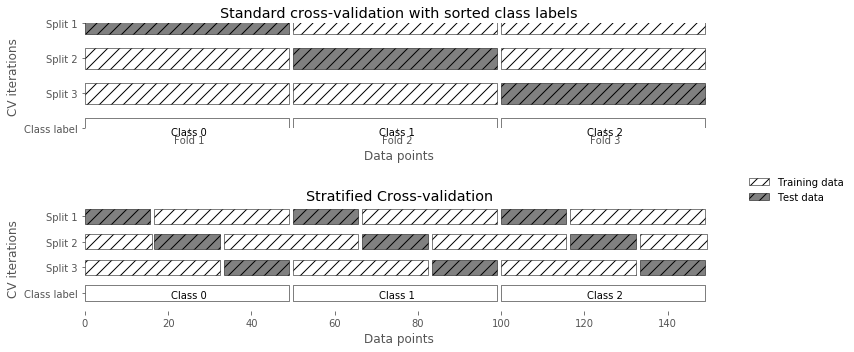

In [18]:
mglearn.plots.plot_stratified_cross_validation()
DT = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(DT, x, y, cv=5)
print("Значения правильности перекрестной проверки: {}".format(scores))
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

### Микровывод: 
Благодаря кросс-валидации получили более точную оценку качества классификатора, но нам пришлось потратить больше времени. Однако это будет оправдано на небольших выборках 

### RandomForestClassifier
RandomForest дает большую точность, чем деревья решений и снижает риск переобучения. Деревья в RandomForest обучаются независимо друг от друга. Из недостатков: требуется O(k) памяти, где k- число деревьев. К достоинствам можно отнести то, что он может работать с большим количеством данных. 

##### Создадим вспомогательную функцию для записи дерева решений в файл

In [19]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Delinquent90', index_label="client_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(75000, 
                                                  predicted_labels.shape[0] + 75000),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [20]:
first_forest = RandomForestClassifier(random_state=17)
first_forest.fit(X_train, y_train)
first_forest_pred = first_forest.predict(X_train)
write_to_submission_file(first_forest_pred, 'first_forest_pred.csv')
print(accuracy_score(y_test, tree.predict(X_test)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AttributeError: module 'sklearn.tree' has no attribute 'predict'

### Логистическая регрессия 
Логистическая регрессия - способ прогнозирования вероятности возникновения некоторого события с одной или несколькими независимыми переменными. Определением зависимости между переменными, одна из которых категориально зависима, а другие независимы. Практическое значение логистической регрессии заключается в том, что она является мощным статистическим методом предсказания событий, который включает в себя одну или несколько независимых переменных. С помощью логистической регрессии можно предсказать значения непрерывной зависимой переменной на интервале от 0 до 1. В логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.

In [ ]:
model_lr = LogisticRegression(solver='lbfgs',random_state=50)
model_lr.fit(X_train, y_train)
print(model_lr.score(X_train, y_train))
print(model_lr.score(X_test, y_test))

### Беггинг
Бэггинг - это технология классификации, использующая композиции алгоритмов, каждый из которых обучается независимо. Результат классификации определяется путем голосования. Бэггинг позволяет снизить процент ошибки классификации в случае, когда высока дисперсия ошибки базового метода. В бэггинге все элементарные классификаторы обучаются и работают параллельно. Идея заключается в том, что классификаторы не исправляют ошибки друг друга, а компенсируют их при "голосовании". Базовые классификаторы должны быть независимыми, это могут быть классификаторы основанные на разных группах методов или же обученные на независимых наборах данных.

In [ ]:
bag = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
bag.fit(X_train, y_train)
print(accuracy_score(y_test, bag.predict(X_test)))

### Бустинги

#### Адаптивный бустинг
AdaBoost - это алгоритма Бустинга, заключается в минимизации ошибки предыдущих моделей и концентрации внимания на недообученности алгоритма. Каждый следующий классификатор строится по объектам, которые плохо классифицируются предыдущими классификаторами. После каждого вызова обновляется распределение весов, которые отвечают важности каждого из объектов обучающего множества для классификации. На каждой итерации веса неверно классифицированных объектов возрастают.

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
print(accuracy_score(y_test, ada.predict(X_test)))

#### Градиентный бустинг
Gradient Boosting работает последовательно, добавляя к предыдущим моделям новые так, чтобы исправлялись допущенные
ими ошибки. Градиентный Бустинг отличается от Адаптивного тем, что, в отличие от AdaBoost, изменяющего веса при 
каждой итерации, Градиентный пытается обучать новые модели по остаточной ошибке прошлых (двигаясь к минимуму функции потерь).

In [ ]:
grad = GradientBoostingClassifier(random_state=0)
grad.fit(X_train, y_train)
print(accuracy_score(y_test, grad.predict(X_test)))

### Строим ROC кривую для логистической регрессии

In [ ]:
# #мартица ошибок
# print(confusion_matrix(Y_test, model_lr.predict(X_test)))
# Y_pred_lr=model_lr.predict(X_test)
# print("Classification Report")
# print(metrics.classification_report(Y_test, Y_pred_lr,digits=4))

# lr_probs = model_lr.predict_proba(X_test)
# preds = lr_probs[:, -1]
# fpr, tpr, threshold = metric.roc_curve(Y_test, preds)
# roc_auc = metric.auc(fpr, tpr)
# # lr_auc = metrics.roc_auc_score(Y_train, lr_probs)
# print('ROC AUC = %.3f' % (roc_auc))




plt.figure(figsize=(12, 8))
y_pred_prob = model_lr.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_prob)
auc = metrics.roc_auc_score(y_train, y_pred_prob)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()




# cm = metric.confusion_matrix(Y_test, tree.predict(X_test))

# print (cm)
# preds = tree.predict(X_test) 

# print(metric.accuracy_score(Y_test, preds))

# #print(metric.f1_score(y_test, preds))
# print('Сбалансированная точность:',metric.balanced_accuracy_score(y_test, preds))
# print('Коэффициент Мэттьюса:',metric.matthews_corrcoef(y_test, preds))
# print('Каппа Коэна:',metric.cohen_kappa_score(y_test, preds))


# pred_prob = tree.predict_proba(X_test)
# preds = pred_prob[:, -1]
# fpr, tpr, threshold = metric.roc_curve(y_test, preds)
# roc_auc = metric.auc(fpr, tpr)

# plt.title('Characteristic')
# plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# tn, fp, fn, tp = cm.ravel()
# TNR = tn / (tn + fp)
# FPR = fp / (tn + fp)
# print('True Negative Rate:', TNR)
# print('False Positive Rate:', FPR)
# print('Площадь под кривой:', roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))

In [ ]:
plt.figure(figsize=(12, 8))
y_pred_prob = tree.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_prob)
auc = metrics.roc_auc_score(y_train, y_pred_prob)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()






In [ ]:
plt.figure(figsize=(12, 8))
y_pred_prob = first_forest.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_prob)
auc = metrics.roc_auc_score(y_train, y_pred_prob)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()




### 2.На основе нашего датасета определим, пользователи каких стран оставляют отзывы об отелях чаще и в какой период года отзывов больше всего.

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt

data=pd.read_csv('/Users/remir/data_project/LasVegasTripAdvisorReviews-Dataset.csv',delimiter=';')
data.head()



In [ ]:
['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
data['Period of stay'] = data['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

In [ ]:


new = data[['User country', 'Score']].copy()
new = new.groupby(['User country']).size().reset_index(name='count')
new['%'] = (new["count"] / len(data))*100
new
new.plot(x ='User country', y='count', kind = 'bar', linewidth=2, figsize=(10,10))
plt.show()


#new.plot.pie(y='count',  labels='User country', figsize=(30, 30), startangle=90)
#plt.show()

labels = new['User country']
sizes = new['count']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
        shadow=True, startangle=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
average_score = data[['User country', 'Score']].copy() 
average_score = average_score.groupby(['User country']).mean() 
average_score.rename(columns={'Score':'average_score'}, 
 inplace=True) 
average_score

In [ ]:
average_score.plot( y='average_score', kind = 'bar', figsize=(10,10)) 
plt.show()